In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

In [38]:
#Reading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [39]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
train["Id"]

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [41]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
test["Id"]

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [43]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [44]:
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

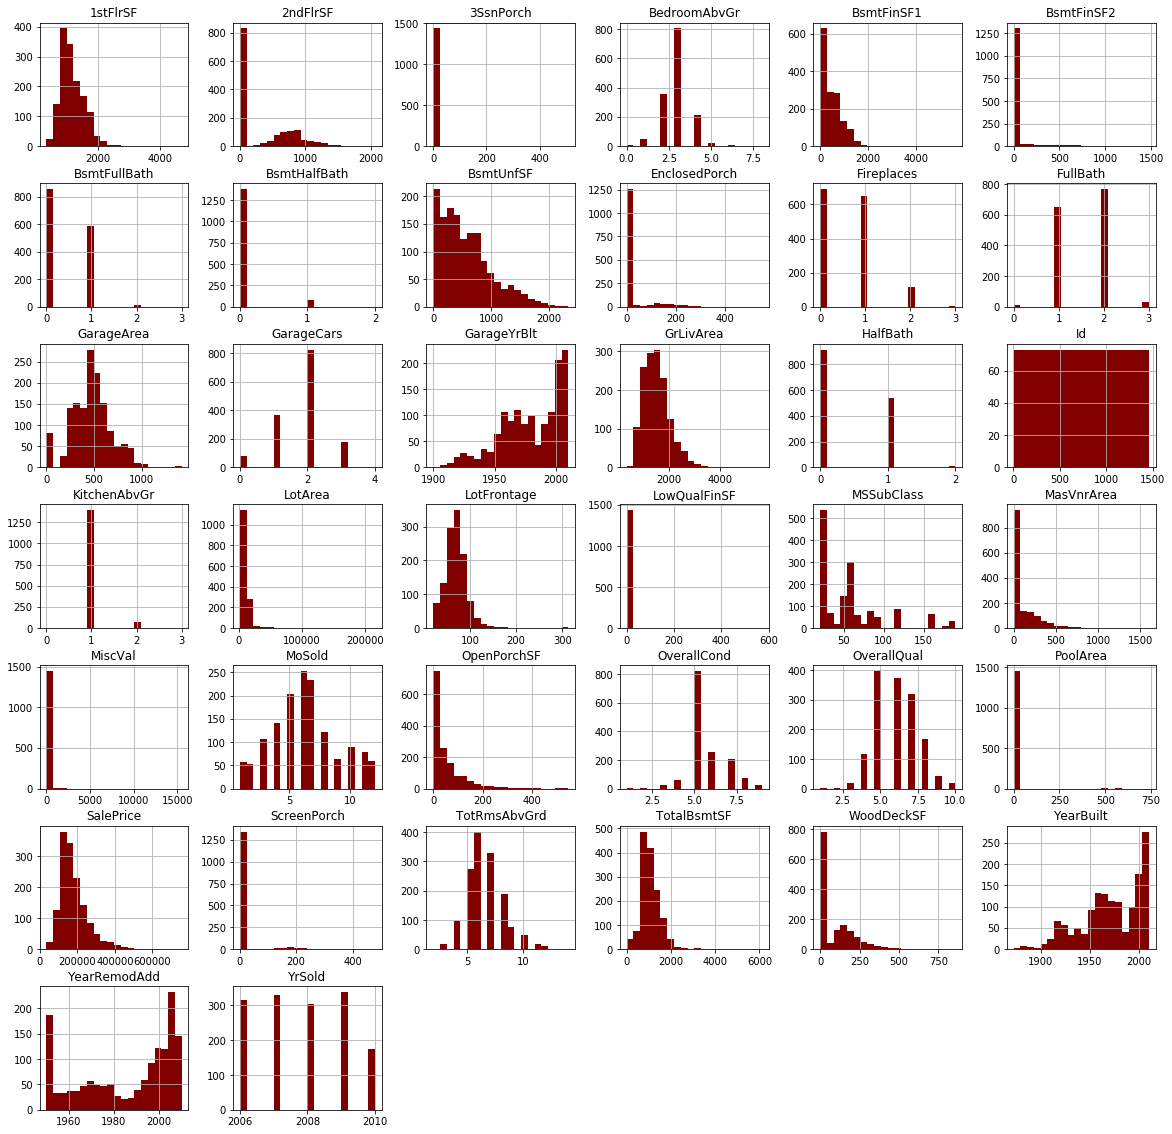

In [45]:
# Data visual
train.hist(figsize=(20,20), color='maroon', bins=20)
plt.show()

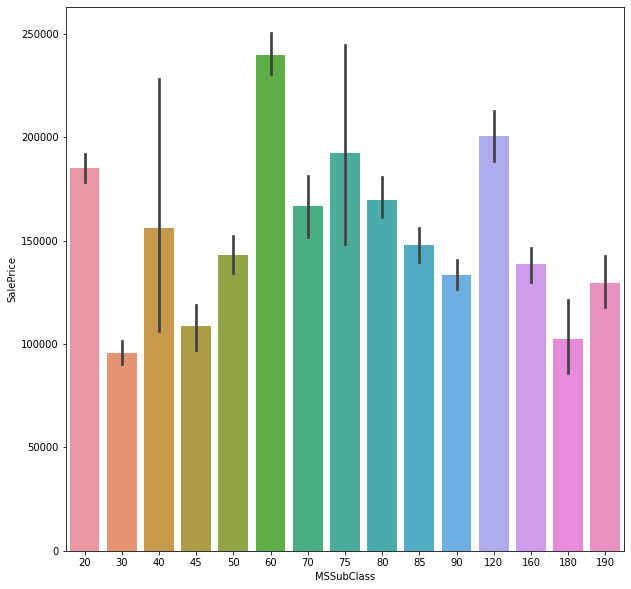

In [46]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x="MSSubClass", y="SalePrice", data=train)



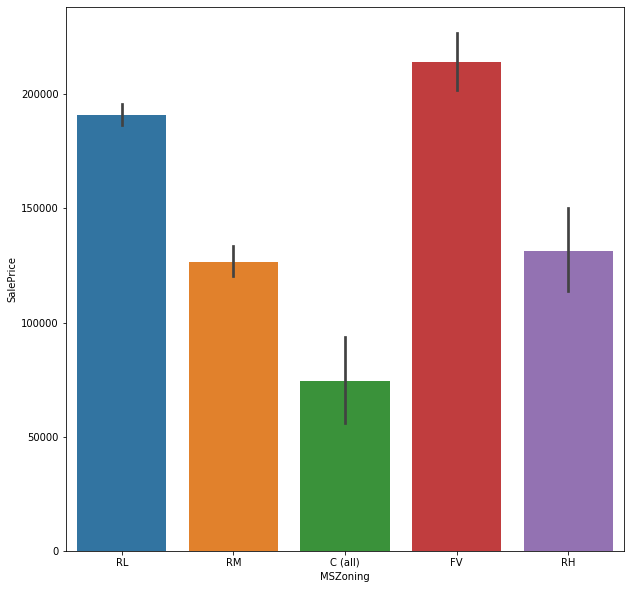

In [47]:
fig = plt.figure(figsize=(10,10))

sns.barplot(x="MSZoning", y="SalePrice", data=train)

In [48]:
#dataset = pd.concat([train, test], sort=False, ignore_index=True)

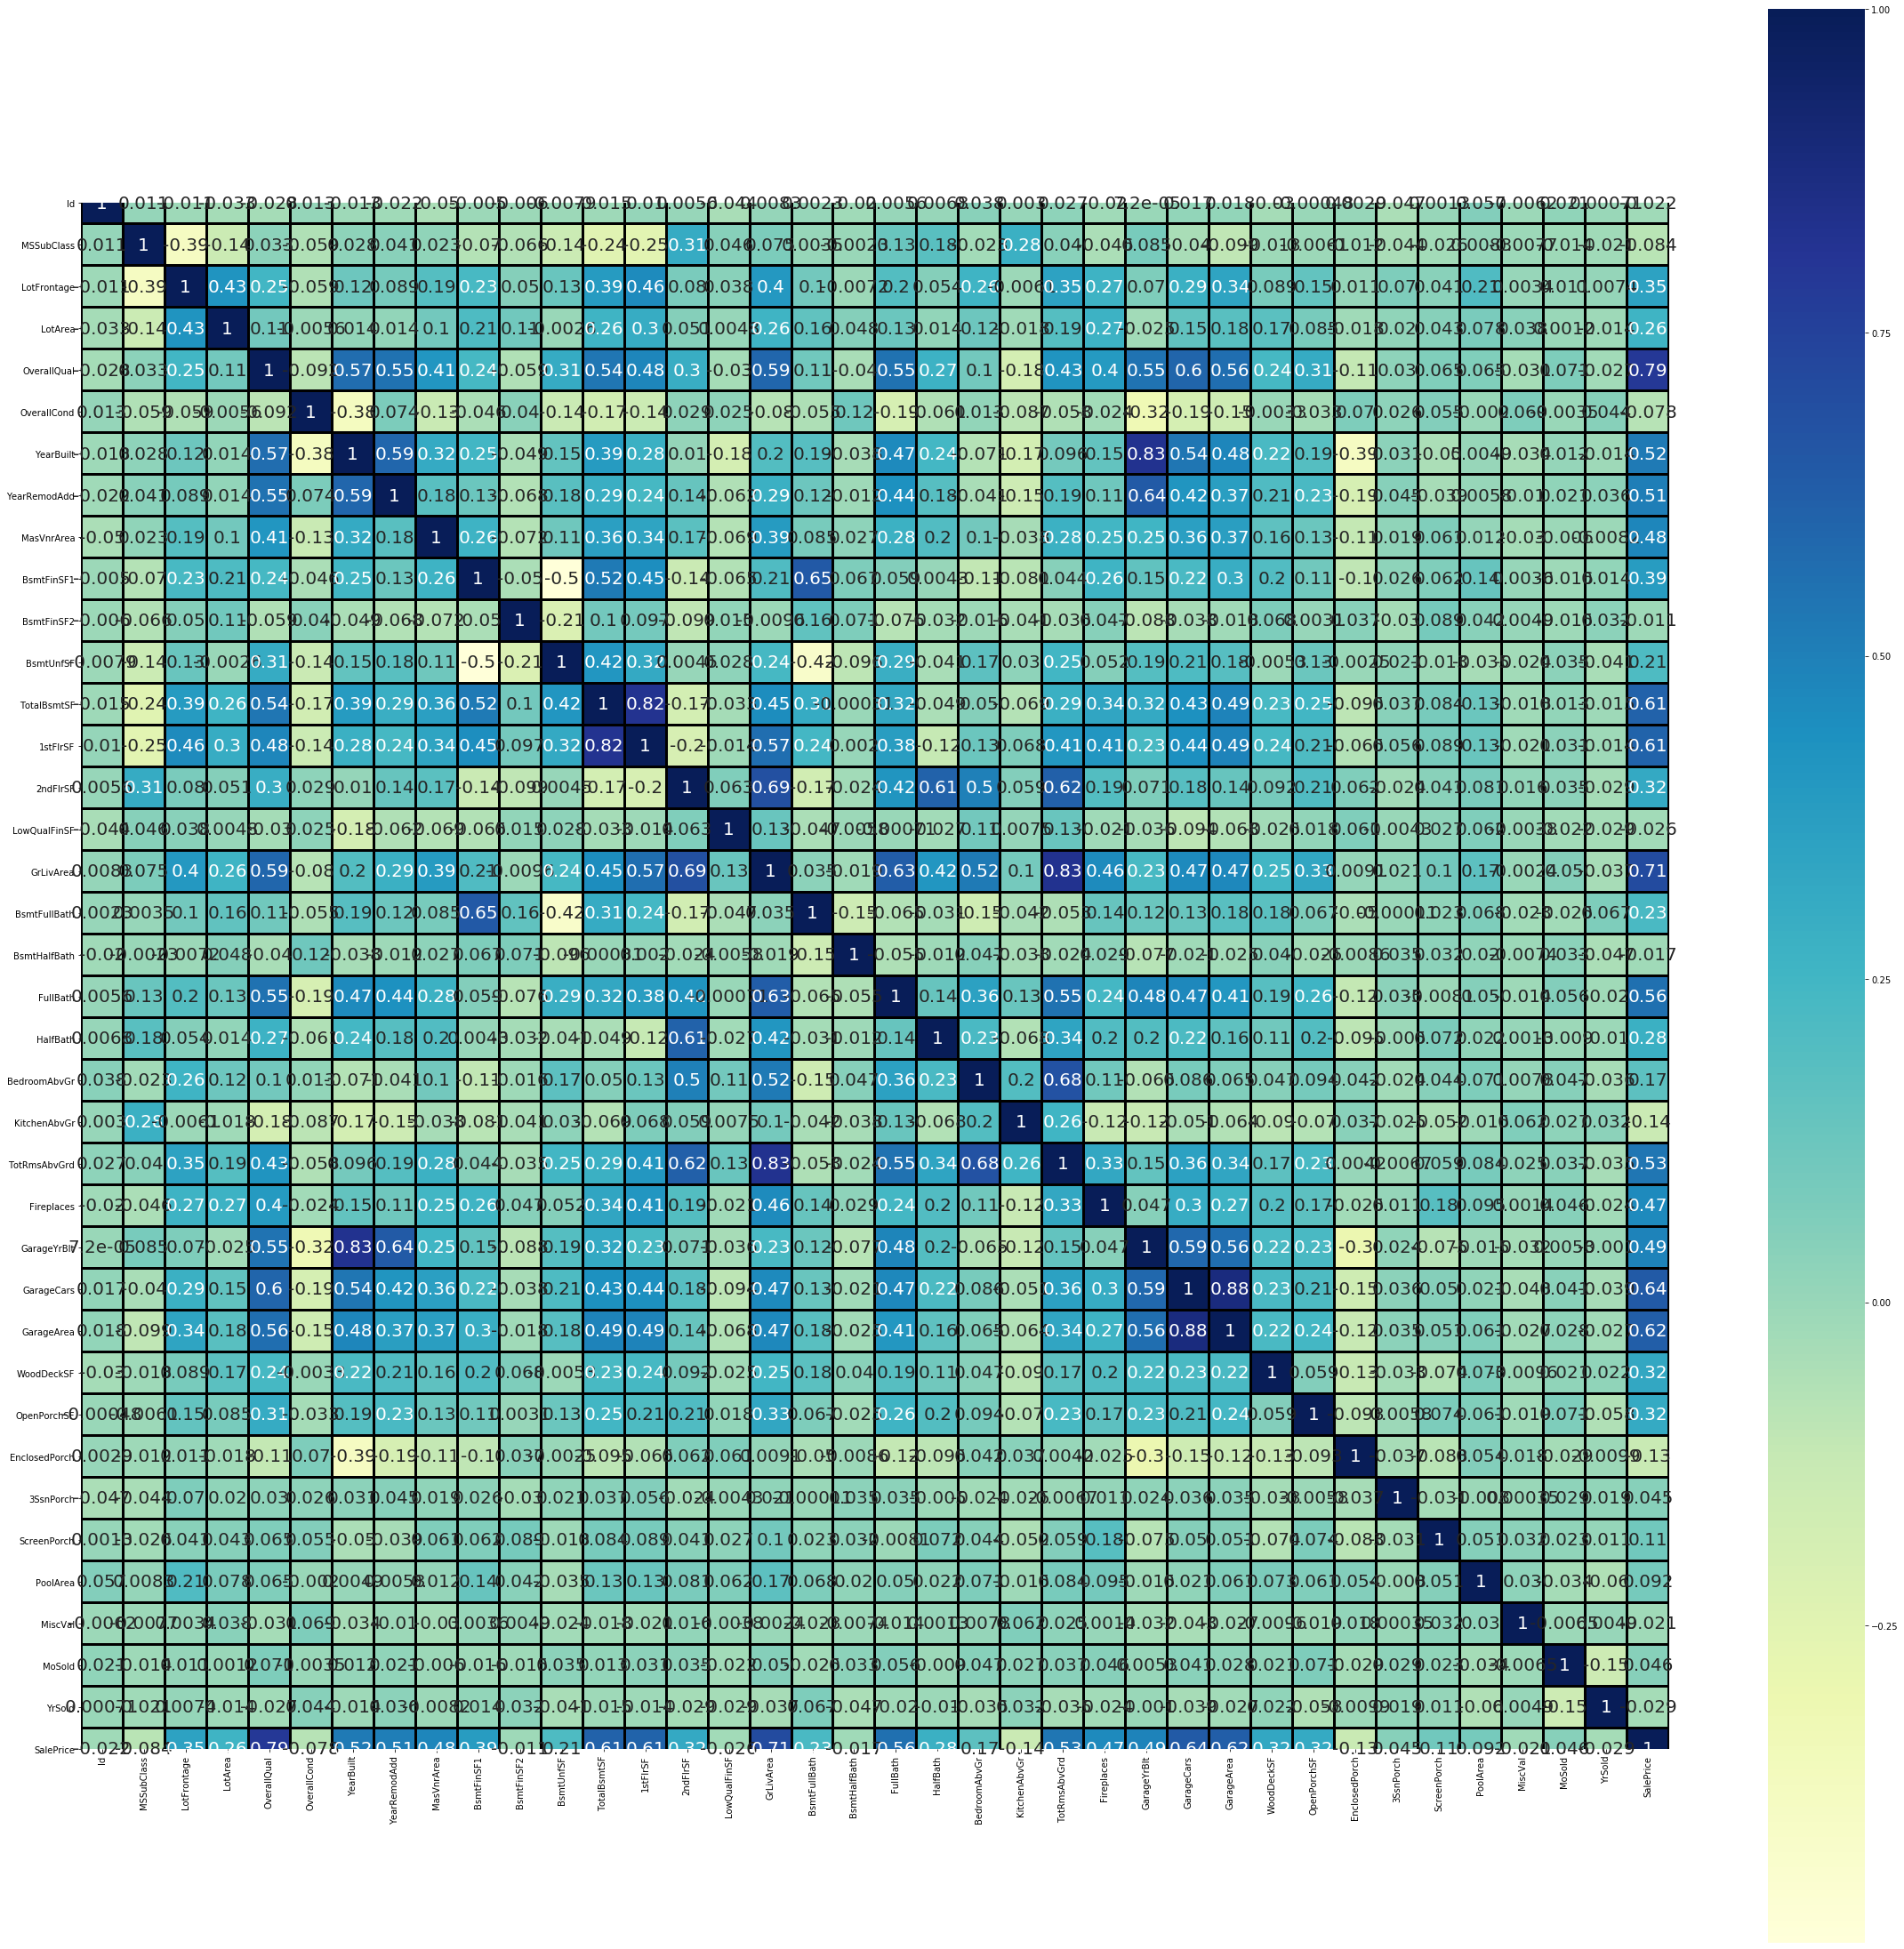

In [49]:
fig, axs = plt.subplots(nrows=1, figsize=(40,40))
sns.heatmap(train.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':20})

In [50]:
train.isnull().sum()/len(train)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [51]:
train=train.fillna(method="ffill")

In [52]:
predictions=['OverallQual','YearBuilt','GrLivArea','MasVnrArea', '1stFlrSF', 'Fireplaces']

X_train=train[predictions].values
X_test=test[predictions].values
y_train=train["SalePrice"].values




In [53]:
pd.value_counts(y_train)

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Length: 663, dtype: int64

In [54]:
cross_val_score(LinearRegression(), X_train, y_train).mean()

0.7566343194321804

In [55]:
cross_val_score(GradientBoostingRegressor(), X_train, y_train).mean()

0.8436002458190557

In [56]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [57]:
X_test

array([[5.000e+00, 1.961e+03, 8.960e+02, 0.000e+00, 8.960e+02, 0.000e+00],
       [6.000e+00, 1.958e+03, 1.329e+03, 1.080e+02, 1.329e+03, 0.000e+00],
       [5.000e+00, 1.997e+03, 1.629e+03, 0.000e+00, 9.280e+02, 1.000e+00],
       ...,
       [5.000e+00, 1.960e+03, 1.224e+03, 0.000e+00, 1.224e+03, 1.000e+00],
       [5.000e+00, 1.992e+03, 9.700e+02, 0.000e+00, 9.700e+02, 0.000e+00],
       [7.000e+00, 1.993e+03, 2.000e+03, 9.400e+01, 9.960e+02, 1.000e+00]])

In [58]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
np.isnan(X_test)

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [60]:
np.where(np.isnan(X_test))

(array([ 231,  246,  422,  532,  544,  581,  851,  865,  880,  889,  908,
        1132, 1197, 1226, 1402], dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))

In [61]:
X_test=np.nan_to_num(X_test)

In [62]:
y_pred=model.predict(X_test)

In [63]:
pd.value_counts(y_pred)

127206.757164    14
81107.515687     12
124254.616389    12
190291.081065     8
137113.617816     8
                 ..
92299.016826      1
222261.978013     1
185216.804455     1
158692.719305     1
316181.943293     1
Length: 1111, dtype: int64

In [64]:
X_test

array([[5.000e+00, 1.961e+03, 8.960e+02, 0.000e+00, 8.960e+02, 0.000e+00],
       [6.000e+00, 1.958e+03, 1.329e+03, 1.080e+02, 1.329e+03, 0.000e+00],
       [5.000e+00, 1.997e+03, 1.629e+03, 0.000e+00, 9.280e+02, 1.000e+00],
       ...,
       [5.000e+00, 1.960e+03, 1.224e+03, 0.000e+00, 1.224e+03, 1.000e+00],
       [5.000e+00, 1.992e+03, 9.700e+02, 0.000e+00, 9.700e+02, 0.000e+00],
       [7.000e+00, 1.993e+03, 2.000e+03, 9.400e+01, 9.960e+02, 1.000e+00]])

In [65]:
df=pd.DataFrame(data=y_pred,columns=["SalePrice"])
len(df["SalePrice"])


1459

In [66]:
df["Id"]= range(1461,2920)
df

,SalePrice,Id
0,124254.616389,1461
1,142484.213467,1462
2,168684.904152,1463
3,179731.944515,1464
4,209902.605624,1465
...,...,...
1454,81107.515687,2915
1455,81107.515687,2916
1456,146501.981141,2917
1457,141368.813925,2918


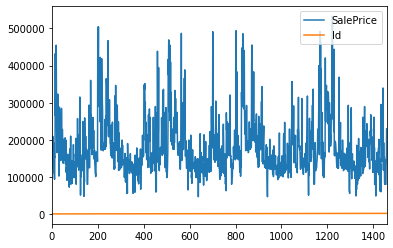

In [67]:
df.plot()

In [68]:
df.to_csv("house_prediction.csv",index=False)

In [2]:
import os
os.path.abspath("house prediction.ipynb")

'C:\\Users\\st950314tw\\Untitled Folder 1\\house prediction.ipynb'